In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
Df=pd.read_csv(r"car data.csv")

In [3]:
Df

,Car_Name,Year,Selling_Price,PricePresent,RunningKM,DrivenFuel,TypeSeller,TypeTransmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual


<Axes: >

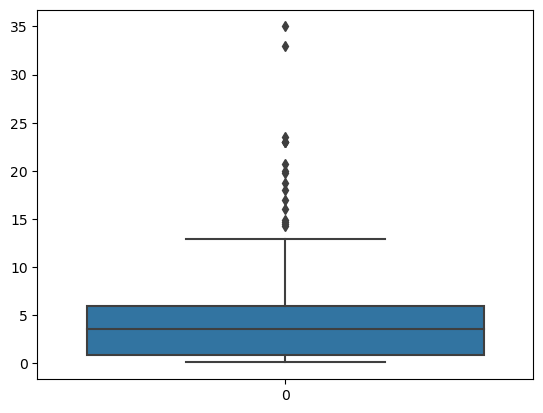

In [4]:
sns.boxplot(Df["Selling_Price"])

In [5]:
percentile25=Df["Selling_Price"].quantile([.25])
percentile75=Df["Selling_Price"].quantile([.75])
iqr=6.0-0.9
upper_limit=percentile75+(1.5*iqr)
lower_limit=percentile25-(1.5*iqr)
print(upper_limit)
print(lower_limit)


0.75    13.65
Name: Selling_Price, dtype: float64
0.25   -6.75
Name: Selling_Price, dtype: float64


In [6]:
df1=Df.query('Selling_Price>-6.75 & Selling_Price<13.65')

<Axes: >

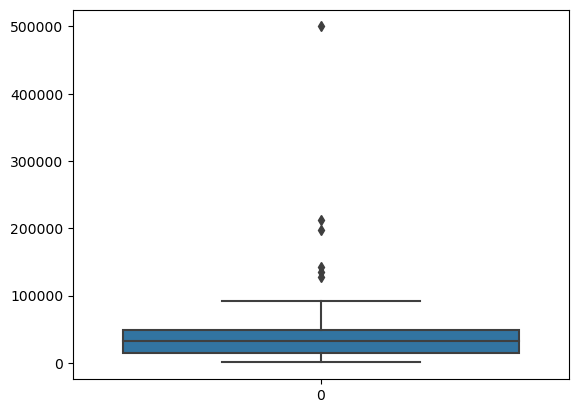

In [7]:
sns.boxplot(df1["RunningKM"])

In [8]:
percentile25=df1["RunningKM"].quantile([.25])
percentile75=df1["RunningKM"].quantile([.75])
iqr=48767.0-15000.0
upper_limit=percentile75+(1.5*iqr)
lower_limit=percentile25-(1.5*iqr)
print(upper_limit)
print(lower_limit)


0.75    98842.25
Name: RunningKM, dtype: float64
0.25   -35649.75
Name: RunningKM, dtype: float64


In [9]:
df2=df1.query('RunningKM>=-35650.5 & RunningKM	<=99417.5')

<Axes: >

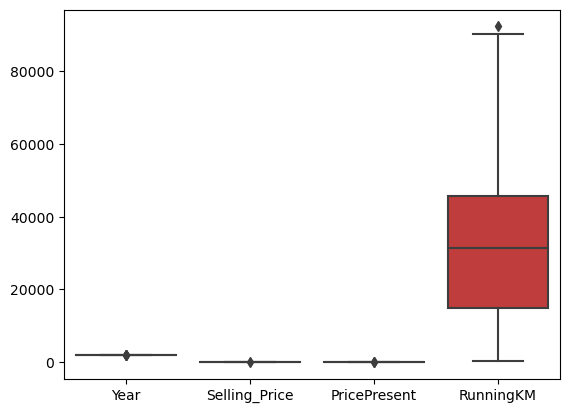

In [10]:
sns.boxplot(df2)

In [11]:
df2["CarAge"]=2024-df2["Year"]

C:\Users\KINGNICKS-DELL\AppData\Local\Temp\ipykernel_11296\460667072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["CarAge"]=2024-df2["Year"]


In [12]:
 df2.drop(labels="Year",axis=1,inplace=True)

C:\Users\KINGNICKS-DELL\AppData\Local\Temp\ipykernel_11296\772672501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(labels="Year",axis=1,inplace=True)


In [13]:
df2

,Car_Name,Selling_Price,PricePresent,RunningKM,DrivenFuel,TypeSeller,TypeTransmission,CarAge
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,10
...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,8
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,9
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,15
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,7


In [14]:
cat=df2[["DrivenFuel","TypeSeller","TypeTransmission"]]

In [15]:
con=df2[["PricePresent","RunningKM","CarAge"]]

In [16]:
cat

,DrivenFuel,TypeSeller,TypeTransmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [17]:
cat_dummies=pd.get_dummies(cat,dtype="int64")

In [18]:
X=pd.concat([con,cat],axis=1)

In [19]:
X

,PricePresent,RunningKM,CarAge,DrivenFuel,TypeSeller,TypeTransmission
0,5.59,27000,10,Petrol,Dealer,Manual
1,9.54,43000,11,Diesel,Dealer,Manual
2,9.85,6900,7,Petrol,Dealer,Manual
3,4.15,5200,13,Petrol,Dealer,Manual
4,6.87,42450,10,Diesel,Dealer,Manual
...,...,...,...,...,...,...
296,11.60,33988,8,Diesel,Dealer,Manual
297,5.90,60000,9,Petrol,Dealer,Manual
298,11.00,87934,15,Petrol,Dealer,Manual
299,12.50,9000,7,Diesel,Dealer,Manual


In [20]:
X["DrivenFuel"].value_counts()

DrivenFuel
Petrol    231
Diesel     45
CNG         2
Name: count, dtype: int64

In [21]:
X["TypeTransmission"]=X["TypeTransmission"].map({"Manual":0,"Automatic":1})

In [22]:
X["DrivenFuel"]=X["DrivenFuel"].map({"Petrol":0,"Diesel":1,"CNG":2})

In [23]:
X["TypeSeller"]=X["TypeSeller"].map({"Dealer":0,"Individual":1})

In [24]:
X

,PricePresent,RunningKM,CarAge,DrivenFuel,TypeSeller,TypeTransmission
0,5.59,27000,10,0,0,0
1,9.54,43000,11,1,0,0
2,9.85,6900,7,0,0,0
3,4.15,5200,13,0,0,0
4,6.87,42450,10,1,0,0
...,...,...,...,...,...,...
296,11.60,33988,8,1,0,0
297,5.90,60000,9,0,0,0
298,11.00,87934,15,0,0,0
299,12.50,9000,7,1,0,0


In [25]:
y=df2["Selling_Price"]

In [26]:
X.shape

(278, 6)

In [27]:
y.shape

(278,)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,train_size=.80)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [31]:
Lr=LinearRegression()

In [32]:
Lr.fit(Xtrain,Ytrain)

LinearRegression()

In [33]:
print(r2_score(Ytest,Lr.predict(Xtest)))

0.8354422987888849


In [34]:
print(r2_score(Ytrain,Lr.predict(Xtrain)))

0.85317554806897


In [35]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


In [36]:
Ridge=Ridge()

In [37]:
Ridge.fit(Xtrain,Ytrain)

Ridge()

In [38]:
print(r2_score(Ytest,Ridge.predict(Xtest)))
print(r2_score(Ytrain,Ridge.predict(Xtrain)))

0.8352084574634927
0.8531194705567922


In [39]:
Lasso=Lasso()

In [40]:
Lasso.fit(Xtrain,Ytrain)

Lasso()

In [41]:
print(r2_score(Ytest,Lasso.predict(Xtest)))
print(r2_score(Ytrain,Lasso.predict(Xtrain)))

0.8077705270862974
0.7866660963857053


In [42]:
Elastic=ElasticNet()

In [43]:
Elastic.fit(Xtrain,Ytrain)

ElasticNet()

In [44]:
print(r2_score(Ytest,Elastic.predict(Xtest)))
print(r2_score(Ytrain,Elastic.predict(Xtrain)))

0.8051219954259309
0.8004542761603249


In [45]:
con=df2[["PricePresent","RunningKM","CarAge"]]

In [46]:
LR=LinearRegression()

In [47]:
LR_final=LR.fit(X,y)
LR_final

LinearRegression()

In [48]:
import joblib

In [49]:
data_new=pd.DataFrame({"PricePresent":20.5,
                       "RunningKM":10000,
                       "CarAge":2,
                       "DrivenFuel":0,
                       "TypeSeller":0,
                       "TypeTransmission":1},index=[0])
                       
                       
                       

In [50]:
from tkinter import *
import tkinter as tkinter
import tkinter 
from tkinter.ttk import Combobox
from PIL import Image


In [52]:
carp=tkinter.Tk()
carp.geometry("700x600")
carp.maxsize(width=700,height=600)
carp.title("Car_Price_Predction")
carbg=PhotoImage(file="carbg.png")
label0=Label(carp,image=carbg).place(x=0,y=0)
#labels & Entry Boxes and Combo Box
label6=Label(fg="Black",bg="red",text="Car_Price_Prediction",font=("TimesNewRomans",15)).place(x=220,y=0)
label1=Label(carp,fg="black",bg="AntiqueWhite",text="Enter Vehical Purchasing Price-",font=("TimesNewRomans",10)).place(x=220,y=50)
label1=Label(carp,fg="black",bg="AntiqueWhite",text="Rs 100000=1.0",font=("TimesNewRomans",8)).place(x=270,y=80)
e1=Entry(carp,bd=5,bg="AntiqueWhite",width=15,font=("TimesNewRomans",10))
e1.place(x=250,y=110)
label2=Label(carp,fg="black",bg="AntiqueWhite",text="RunningKM-",font=("TimesNewRomans",10)).place(x=270,y=150)
e2=Entry(carp,bd=5,bg="AntiqueWhite",width=15,font=("TimesNewRomans",10))
e2.place(x=250,y=180)
label3=Label(carp,fg="black",bg="AntiqueWhite",text="CarAge- Current Year-Purchasing year",font=("TimesNewRomans",10)).place(x=220,y=220)
e3=Entry(carp,bd=5,bg="AntiqueWhite",width=15,font=("TimesNewRomans",10))
e3.place(x=250,y=250)
label4=Label(carp,fg="black",bg="AntiqueWhite",text='DrivenFuel="Petrol":0,"Diesel":1,"CNG":2"-',font=("TimesNewRomans",9)).place(x=220,y=290)
a=["0","1","2"]
box1=Combobox(carp,value=a)
box1['state']="readonly"
box1.place(x=250,y=320)
label5=Label(carp,fg="black",bg="AntiqueWhite",text='"TypeSeller="Dealer":0,"Individual":1"-',font=("TimesNewRomans",9)).place(x=220,y=350)
b=["0","1"]
box2=Combobox(carp,value=b)
box2['state']="readonly"
box2.place(x=250,y=380)
label5=Label(carp,fg="black",bg="AntiqueWhite",text='"TypeTransmission"="Manual":0,"Automatic":1-',font=("TimesNewRomans",9)).place(x=220,y=410)
c=["0","1"]
box3=Combobox(carp,value=c)
box3['state']="readonly"
box3.place(x=250,y=440)
label6=Label(carp,text="Predicted Price",bg="black",fg="white",font=("TimesNewRomans",15)).place(x=250,y=470)
e6=Entry(carp,bg="AntiqueWhite",width=20,font=("TimesNewRomans",16))
e6.place(x=220,y=510)
#functions

def reset():
    e1.delete(0,END)
    e2.delete(0,END)
    e3.delete(0,END)
    e6.delete(0,END)
    box1.delete(0,END)
    box2.delete(0,END)
    box3.delete(0,END)

def model():
    p1=Entry.get(e1)
    p1=eval(p1)
    p2=Entry.get(e2)
    p2=eval(p2)
    p3=Entry.get(e3)
    p3=eval(p3)
    p4=Combobox.get(box1)
    p4=eval(p4)
    p5=Combobox.get(box2)
    p5=eval(p5)
    p6=Combobox.get(box3)
    p6=eval(p6)
    model=joblib.load("Car_Price_Pridction")
    data=pd.DataFrame({"PricePresent":p1,
                       "RunningKM":p2,
                       "CarAge":p3,
                       "DrivenFuel":p4,
                       "TypeSeller":p5,
                       "TypeTransmission":p6},index=[0])
    result=model.predict(data)
    Entry.insert(e6,0,result)
    print(result)
#Buttons
b1=Button(carp,text="Prediction",bg="yellow",command=model)
b1.place(x=220,y=550)
b2=Button(carp,text="Reset",bg="yellow",command=reset)
b2.place(x=370,y=550)
carp.mainloop()

[5.8497611]
